# ILS

In [ ]:
def get_content_recommendations(movie_id, tfidf_matrix, movies_df, top_k=10):
    movie_id = int(movie_id) if isinstance(movie_id, (int, str)) else movie_id
    
    logger.info(f"Processing recommendations for movie_id: {movie_id}")
    idx = movies_df.index[movies_df['movieId'] == movie_id].tolist()
    idx = idx[0]
    
    cosine_sim = cosine_similarity(tfidf_matrix[idx:idx+1], tfidf_matrix)[0]

    sim_scores = list(enumerate(cosine_sim))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_k+1]
    
    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]
    result = movies_df[['movieId', 'title']].iloc[movie_indices].copy()
    result['similarity_score'] = similarity_scores
    logger.info(f"Found {len(result)} recommendations for movie_id={movie_id}")
    return result

In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
import joblib

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load movies_df and tfidf_matrix
movies_df = joblib.load('movies_df.pkl')
tfidf_matrix = joblib.load('tfidf_matrix.pkl')

# Sample movie IDs function
def sample_movie_ids(n):
    if n < 1 or n > len(movies_df):
        logger.error(f"Cannot sample {n} movie IDs; only {len(movies_df)} available")
        return []
    return movies_df['movieId'].sample(n, random_state=42).tolist()

def evaluate_ils(movie_id, tfidf_matrix, movies_df, top_k=10):
    try:
        recommendations = get_content_recommendations(movie_id, tfidf_matrix, movies_df, top_k)
        indices = movies_df.index[movies_df['movieId'].isin(recommendations['movieId'])].tolist()
        if len(indices) < 2:
            logger.warning(f"Movie ID {movie_id}: Fewer than 2 recommendations; returning ILS=0.0")
            return 0.0
        # Ensure valid tfidf_matrix slices
        valid_indices = [i for i in indices if i < tfidf_matrix.shape[0] and tfidf_matrix[i:i+1].shape[0] > 0]
        if len(valid_indices) < 2:
            logger.warning(f"Movie ID {movie_id}: Insufficient valid indices; returning ILS=0.0")
            return 0.0
        pairwise_sims = [cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[j:j+1])[0][0]
                         for i, j in combinations(valid_indices, 2)]
        ils = np.mean(pairwise_sims) if pairwise_sims else 0.0
        logger.info(f"ILS for movie_id {movie_id}: {ils}")
        return ils
    except Exception as e:
        logger.error(f"Error computing ILS for movie_id {movie_id}: {e}")
        return 0.0

n = 1000
movie_ids = sample_movie_ids(n)
print(f"Sampled {n} Movie IDs:")
print(movie_ids)

ils_results = []
for movie_id in movie_ids:
    ils_score = evaluate_ils(movie_id, tfidf_matrix, movies_df)
    try:
        movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].iloc[0]
    except IndexError:
        movie_title = f"Unknown (ID {movie_id})"
        logger.warning(f"No title found for movie_id {movie_id}")
    ils_results.append({'Movie ID': movie_id, 'Title': movie_title, 'ILS Score': round(ils_score, 4)})

results_df_1000 = pd.DataFrame(ils_results)
print("\nILS Evaluation Results:")
display(results_df_1000)

INFO:__main__:Processing recommendations for movie_id: 71063
INFO:__main__:Found 10 recommendations for movie_id=71063
INFO:__main__:ILS for movie_id 71063: 1.0
INFO:__main__:Processing recommendations for movie_id: 6283
INFO:__main__:Found 10 recommendations for movie_id=6283
INFO:__main__:ILS for movie_id 6283: 0.016217822279478735


Sampled 1000 Movie IDs:
[71063, 6283, 38980, 244260, 45317, 108227, 93708, 16139, 1720, 26447, 53168, 32526, 27306, 60140, 253377, 429238, 184819, 72968, 9701, 18820, 88269, 238615, 434, 49235, 53232, 41078, 29067, 46869, 195862, 41556, 48646, 2094, 106176, 60534, 334057, 186585, 268297, 94326, 354150, 350555, 22649, 417877, 921, 1996, 42077, 9876, 376263, 39113, 247777, 44546, 195557, 20949, 19183, 61542, 102078, 6103, 32929, 210050, 429101, 36261, 79212, 42762, 97073, 149117, 403330, 64945, 407965, 8076, 132038, 53482, 15543, 74491, 261192, 1487, 179715, 72026, 42848, 85242, 76234, 72483, 21115, 14407, 41653, 43616, 15120, 61144, 98344, 215924, 1443, 76825, 254320, 22084, 11107, 38414, 34424, 15752, 42697, 40341, 33389, 42466, 373476, 260346, 50652, 17831, 290075, 2813, 159638, 11303, 127798, 10797, 67166, 8340, 115463, 19158, 313297, 121572, 17346, 11360, 9893, 38458, 163924, 30583, 64225, 121357, 239536, 64861, 361571, 31930, 61501, 56332, 67232, 14282, 34995, 63585, 197528, 342878

INFO:__main__:Processing recommendations for movie_id: 38980
INFO:__main__:Found 10 recommendations for movie_id=38980
INFO:__main__:ILS for movie_id 38980: 0.012681528431765631
INFO:__main__:Processing recommendations for movie_id: 244260
INFO:__main__:Found 10 recommendations for movie_id=244260
INFO:__main__:ILS for movie_id 244260: 0.04299204001088967
INFO:__main__:Processing recommendations for movie_id: 45317
INFO:__main__:Found 10 recommendations for movie_id=45317
INFO:__main__:ILS for movie_id 45317: 0.1060395389427693
INFO:__main__:Processing recommendations for movie_id: 108227
INFO:__main__:Found 10 recommendations for movie_id=108227
INFO:__main__:ILS for movie_id 108227: 0.0352064910774947
INFO:__main__:Processing recommendations for movie_id: 93708
INFO:__main__:Found 10 recommendations for movie_id=93708
INFO:__main__:ILS for movie_id 93708: 0.023403956540290267
INFO:__main__:Processing recommendations for movie_id: 16139
INFO:__main__:Found 10 recommendations for movie


ILS Evaluation Results:


,Movie ID,Title,ILS Score
0,71063,The Flying Dutchman,1.0000
1,6283,MouseHunt,0.0162
2,38980,The Wild Life,0.0127
3,244260,Little Accidents,0.0430
4,45317,The Fighter,0.1060
...,...,...,...
995,61217,I cavalieri che fecero l'impresa,0.0352
996,41023,Dead Men Walk,0.0291
997,40509,Wrestling Ernest Hemingway,0.0284
998,401,Garden State,0.0282


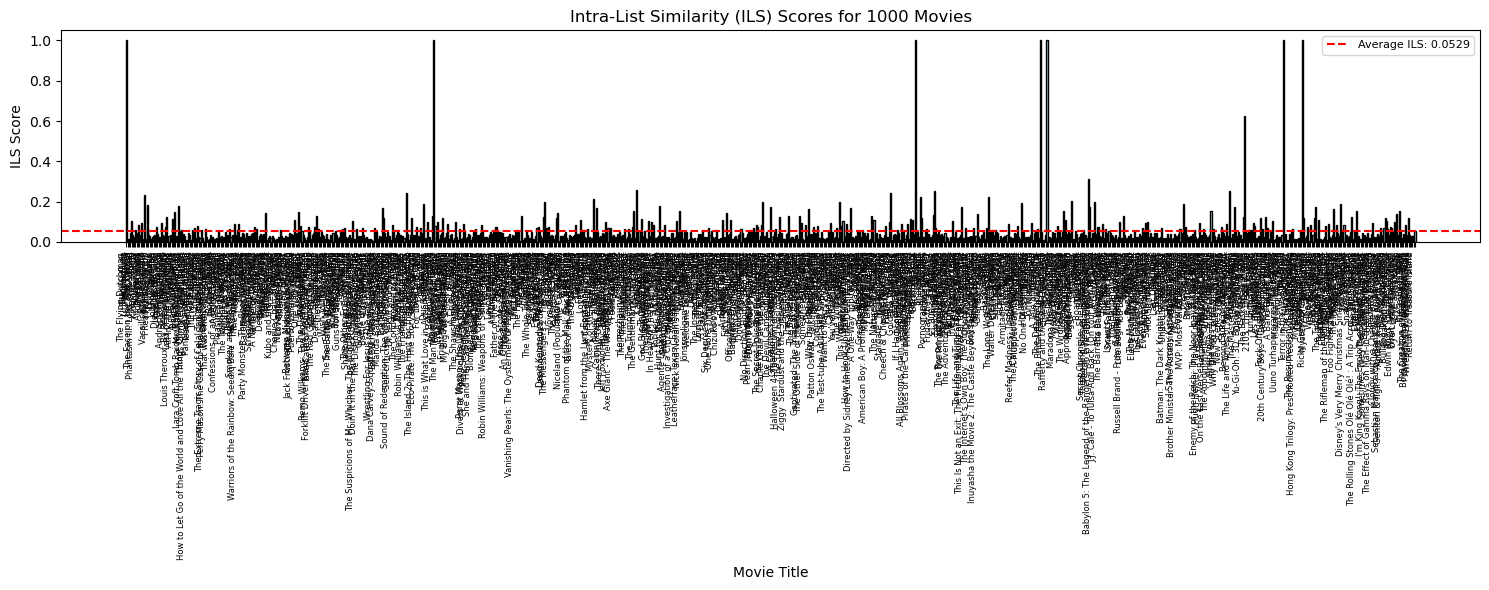

In [ ]:
avg_ils = results_df_1000['ILS Score'].mean()

plt.figure(figsize=(15, 6))
bars = plt.bar(results_df_1000['Title'], results_df_1000['ILS Score'], color='lightblue', edgecolor='black')
plt.axhline(y=avg_ils, color='red', linestyle='--', label=f'Average ILS: {avg_ils:.4f}')
plt.xlabel('Movie Title', fontsize=10)
plt.ylabel('ILS Score', fontsize=10)
plt.title('Intra-List Similarity (ILS) Scores for 1000 Movies', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.legend(fontsize=8)
plt.tight_layout()

plt.show()

In [34]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Movie ID   100 non-null    int64  
 1   Title      100 non-null    object 
 2   ILS Score  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB
